In [ ]:
# nPkをMで割ったあまり
def nPk(N,K):
    M = 10**9 + 7 # 素数
    a = 1
    for i in range(N-K):
        a *= i+1
        a %= M
    b = a
    for i in range(N-K,N):
        b *= i+1
        b %= M
    ans = pow(a,M-2,M) #フェルマーの⼩定理より, 剰余の割り算 = M-2乗を掛ける
    ans *= b
    ans %= M
    return ans

N=5
K=3
nPk(N,K)

60

In [ ]:
# nCkをMで割ったあまり
def nCk(N,K):
    M = 10**9 + 7 # 素数
    a = 1
    for i in range(N-K):
        a *= i+1
        a %= M
    b = a
    for i in range(N-K,N):
        b *= i+1
        b %= M
    c = 1
    for i in range(K):
        c *= i+1
        c %= M
    ans = pow(a,M-2,M) #剰余の割り算 = M-2乗を掛ける
    ans *= pow(c,M-2,M)
    ans %= M
    ans *= b
    ans %= M
    return ans

N=5
K=3
nCk(N,K)

10

In [ ]:
# Algo 1-1 累積和
lines=[0 for i in range(2)]
lines[0]='1 1'
lines[1]='0'
N,M=[int(x.strip()) for x in lines[0].split()]
A=[int(x.strip()) for x in lines[1].split()]
sumA=0
for i in range(M):
  sumA+=A[i]
maxA=sumA
index=1
for i in range(N-M):
  sumA=sumA+A[M+i]-A[i]
  if maxA<sumA:
    maxA=sumA
    index=i+2

print(maxA, index)

0 1


In [ ]:
# ist 2022 3
def CountTinS(S,T,k):
    cnt = 0
    N = len(S)
    M = len(T)
    for i in range(N-M+1):
        for j in range(M):
            if S[i+j] != T[j]:
                break
            if j == M-1:
                cnt +=1
    return cnt

S = [1,2,0,2,1,0,2,1]
T = [2,1]
k = 3
CountTinS(S,T,k)

2

In [ ]:
# O(n)ver
def CountTinS2(S,T,k):
    def matchTinS(numS):
        return True if numS == numT else False
        
    cnt = 0
    N = len(S)
    M = len(T)
    numS = 0
    numT = 0
    for i in range(M):
        numS += S[i] * pow(k,M-i-1)
        numT += T[i] * pow(k,M-i-1)
    for i in range(N-M+1):
        if i > 0:
            numS = (numS - S[i-1] * pow(k,M-1)) * k + S[i+M-1]
        if matchTinS(numS):
            cnt +=1
    return cnt

S = [1,2,0,2,1,0,2,1]
T = [2,1]
k = 3
CountTinS2(S,T,k)

2

<function matplotlib.pyplot.show(close=None, block=None)>

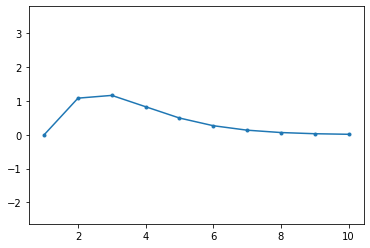

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.axes().set_aspect('equal', 'datalim')
n = 10
N = np.arange(1, n+1)
x = (N ** 3) * np.exp(-N) * np.sin(np.pi/N)
plt.plot(N, x, marker=".")
plt.show

In [ ]:
y = np.array([len(N), max(x), np.where(x == min(x))[0].tolist()[0]])
print(y)

[10.          1.16415538  0.        ]


In [ ]:
a = np.random.normal(loc = 1, scale = np.sqrt(100), size  = 5)
b = 2 * np.random.rand(5) - 1
X = np.matrix([a, b])
print(X)

[[14.11425088 12.80022746 -4.40471495  3.59558192 19.10768078]
 [ 0.47677663  0.20531775 -0.28449202  0.20393708  0.43916679]]


In [3]:
import requests
import json
endpoint = 'https://api.github.com/graphql'
token = ''

def post(query):
    headers = {"Authorization": "bearer " + token}
    res = requests.post(endpoint, json=query, headers=headers)
    if res.status_code != 200:
      raise Exception("failed : {}".format(res.status_code))
    return res.json()

In [4]:
# query
query0 = { 'query' : """
  query {
    search(query: "language:python stars:>=1000 sort:stars", type: REPOSITORY, first: 10) {
      edges {
        node {
          ... on Repository {
            nameWithOwner
            url
            createdAt
            description
            stargazers{
              totalCount
            }
          }
        }
      }
    }
  }
  """
}

query = { 'query' : """
  query userInfo($username: String!) {
    user(login: $username) {
      createdAt
      contributionsCollection {
        totalCommitContributions
        restrictedContributionsCount
      }
      organizations(first: 1) {
        totalCount
      }
      followers(first: 1) {
        totalCount
      }
    }
  }
  """
  , 'variables' : {'username' : 'wolfram1293'}
}

# post
res = post(query)
#print('{}'.format(json.dumps(res)))
print(res['data']['user']['organizations']['totalCount'])

4
